In [1]:
from environment import MultiAgentGridEnv
from learner import train, evaluate
from utils import running_average, display_plot, save_reward, save_model
import time

In [2]:
grid_file = 'grid_world.json'

# ENTROPY REGULARIZATION WEIGHT (BETA) - [`0.0001, 0.001, 0.01, 0.05, 0.1`]

In [3]:
rewards_list = []
agents_list = []
episodes_list = []
names = []
beta_list = [0.0001, 0.001, 0.01, 0.05, 0.1]

In [4]:
for beta in beta_list:
    agent, rewards, episodes = train(max_episode=5000, entropy_weight=beta)
    agents_list.append(agent)
    rewards_list.append(rewards)
    episodes_list.append(episodes)
    names.append(str(beta))
    time.sleep(240)
    save_reward(f'reward/entropy/{beta}/reward.txt', rewards=rewards)
    save_model(f'model/entropy/{beta}', agent.actors)
    print('---------------------------------')

Episode 0 return: -10172.00
Episode 1000 return: 9294.00
Episode 2000 return: 10286.00
Episode 3000 return: 12008.00
Episode 4000 return: 7796.00
---------------------------------
Episode 0 return: -4547.00
Episode 1000 return: 11260.00
Episode 2000 return: 10745.00
Episode 3000 return: 11099.00
Episode 4000 return: 10924.00
---------------------------------
Episode 0 return: -9984.00
Episode 1000 return: 8668.00
Episode 2000 return: 9733.00
Episode 3000 return: 12118.00
Episode 4000 return: 11606.00
---------------------------------
Episode 0 return: -1745.00
Episode 1000 return: 6345.00
Episode 2000 return: 7425.00
Episode 3000 return: 5692.00
Episode 4000 return: 9975.00
---------------------------------
Episode 0 return: -2702.00
Episode 1000 return: 5340.00
Episode 2000 return: 4715.00
Episode 3000 return: 4149.00
Episode 4000 return: 4362.00
---------------------------------


Plot saved


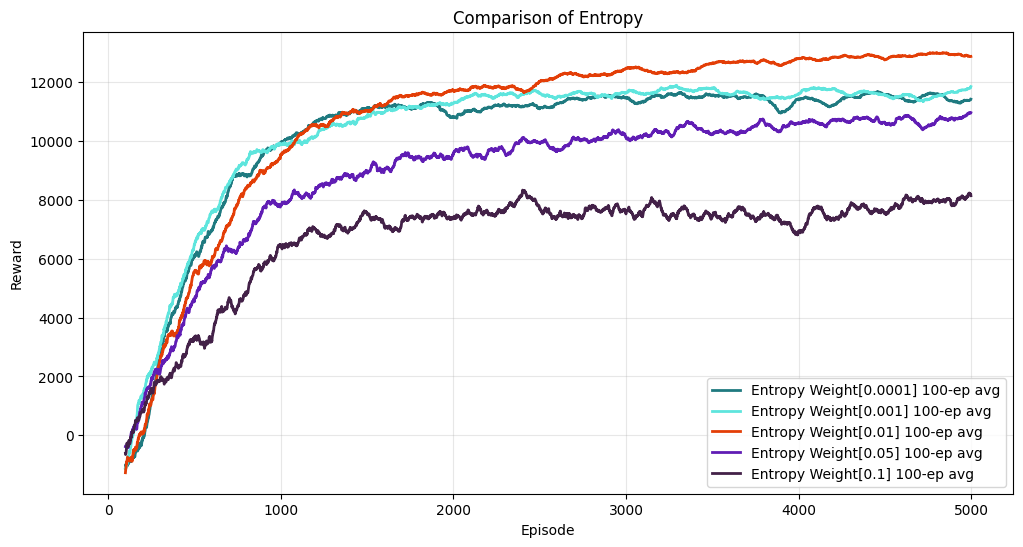

In [10]:
display_plot(rewards_list=rewards_list,
             episodes_list=episodes_list,
             names=names,
             plot_title='Entropy',
             save=True)

# DISCOUNT FACTOR (GAMMA) - `[0.5, 0.7, 0.85, 0.95, 0.99]`

In [3]:
rewards_list = []
agents_list = []
episodes_list = []
names = []
gamma_lists = [0.3, 0.5, 0.8, 0.95, 0.99]

In [ ]:
for gamma in gamma_lists:
    agent, rewards, episodes = train(max_episode=5000, gamma=gamma)
    agents_list.append(agent)
    rewards_list.append(rewards)
    episodes_list.append(episodes)
    names.append(str(gamma))
    save_reward(f'reward/discount_factor/{gamma}/reward.txt', rewards=rewards)
    save_model(f'model/discount_factor/{gamma}/', agent.actors)
    time.sleep(240)
    print('---------------------------------')

Episode 0 return: -5062.00
Episode 1000 return: 3903.00
Episode 2000 return: 4548.00
Episode 3000 return: -3382.00
Episode 4000 return: 4249.00
---------------------------------
Episode 0 return: -7400.00
Episode 1000 return: 3872.00
Episode 2000 return: 7276.00
Episode 3000 return: 1710.00
Episode 4000 return: 7057.00
---------------------------------
Episode 0 return: -4262.00
Episode 1000 return: 4789.00
Episode 2000 return: 6686.00
Episode 3000 return: 7025.00
Episode 4000 return: 4756.00
---------------------------------
Episode 0 return: -858.00
Episode 1000 return: 3685.00
Episode 2000 return: 8013.00
Episode 3000 return: 9559.00
Episode 4000 return: 7259.00
---------------------------------
Episode 0 return: -2036.00
Episode 1000 return: 7069.00
Episode 2000 return: 6636.00
Episode 3000 return: 10833.00
Episode 4000 return: 10129.00
---------------------------------


# LEARNING RATES
- Critic - `[0.00001, 0.0001, 0.0003, 0.0005]`
- Actor - `[0.0001, 0.0005, 0.001, 0.005]`

In [8]:
actor_lrs = [0.00001, 0.0001, 0.0003, 0.0005]  # 4 values
critic_lrs = [0.0001, 0.0005, 0.001, 0.005]     # 4 values
configs = []

for actor_lr in actor_lrs:
    for critic_lr in critic_lrs:
        configs.append((actor_lr, critic_lr))

rewards_list = []
agents_list = []
episodes_list = []
names = []

In [10]:
for config in configs:
    actor_lr = config[0]
    critic_lr = config[1]
    agent, rewards, episodes = train(
        max_episode=5000, actor_lr=actor_lr, critic_lr=critic_lr, gamma=0.99, entropy_weight=0.01)
    agents_list.append(agent)
    rewards_list.append(rewards)
    episodes_list.append(episodes)

    name = str(actor_lr)+'&'+str(critic_lr)
    names.append(name)
    save_reward(f'reward/learning_rate/{name}/reward.txt', rewards=rewards)
    save_model(f'model/learning_rate/{name}/', agent.actors)

    time.sleep(240)
    print('---------------------------------')

Episode 0 return: -913.00
Episode 1000 return: 168.00
Episode 2000 return: -1517.00
Episode 3000 return: 315.00
Episode 4000 return: 4127.00
---------------------------------
Episode 0 return: -6382.00
Episode 1000 return: -6090.00
Episode 2000 return: -2908.00
Episode 3000 return: 4955.00
Episode 4000 return: 3951.00
---------------------------------
Episode 0 return: 555.00
Episode 1000 return: -5018.00
Episode 2000 return: 356.00
Episode 3000 return: 227.00
Episode 4000 return: 4268.00
---------------------------------
Episode 0 return: -2013.00
Episode 1000 return: -1408.00
Episode 2000 return: 526.00
Episode 3000 return: 3780.00
Episode 4000 return: 4118.00
---------------------------------
Episode 0 return: -6462.00
Episode 1000 return: 8150.00
Episode 2000 return: 11723.00
Episode 3000 return: 11212.00
Episode 4000 return: 12308.00
---------------------------------
Episode 0 return: -7664.00
Episode 1000 return: 8653.00
Episode 2000 return: 10335.00
Episode 3000 return: 11643.00

Plot saved


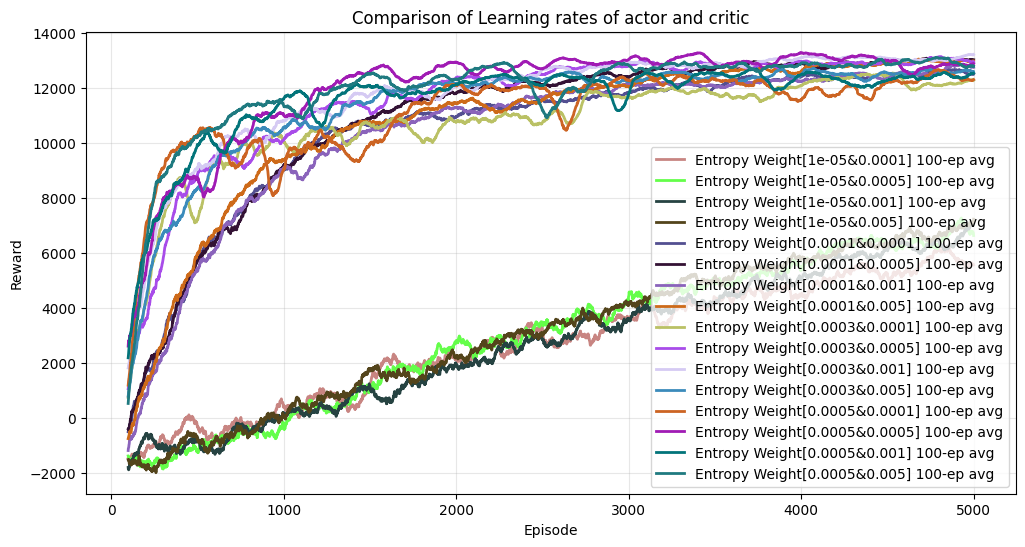

In [11]:
display_plot(rewards_list=rewards_list,
             episodes_list=episodes_list,
             names=names,
             plot_title='Learning rates of actor and critic',
             save=True)

Plot saved


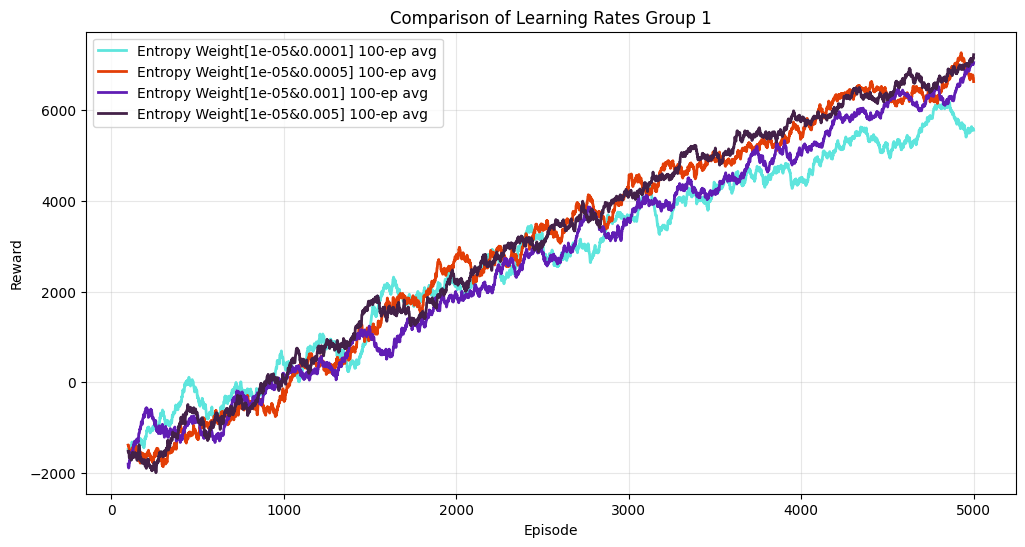

Plot saved


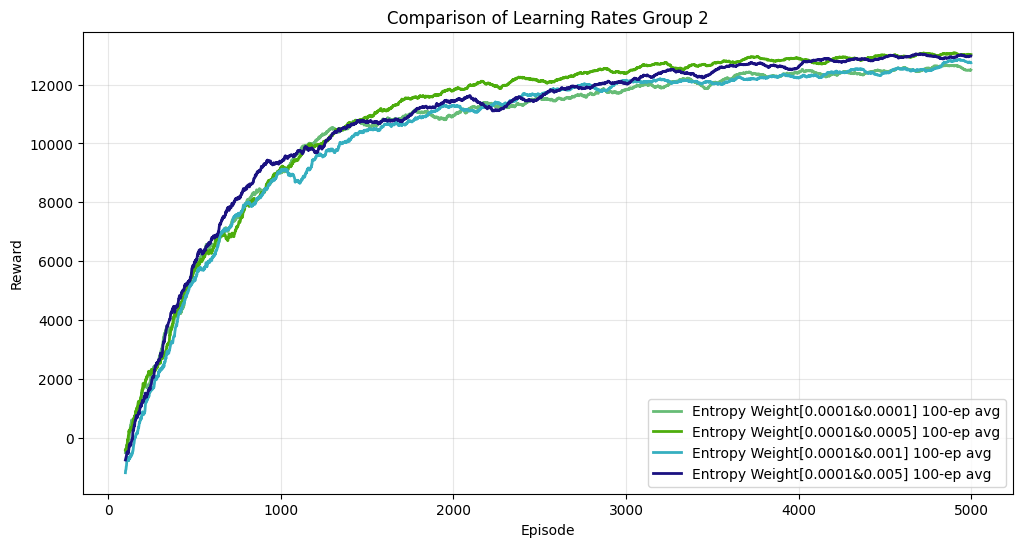

Plot saved


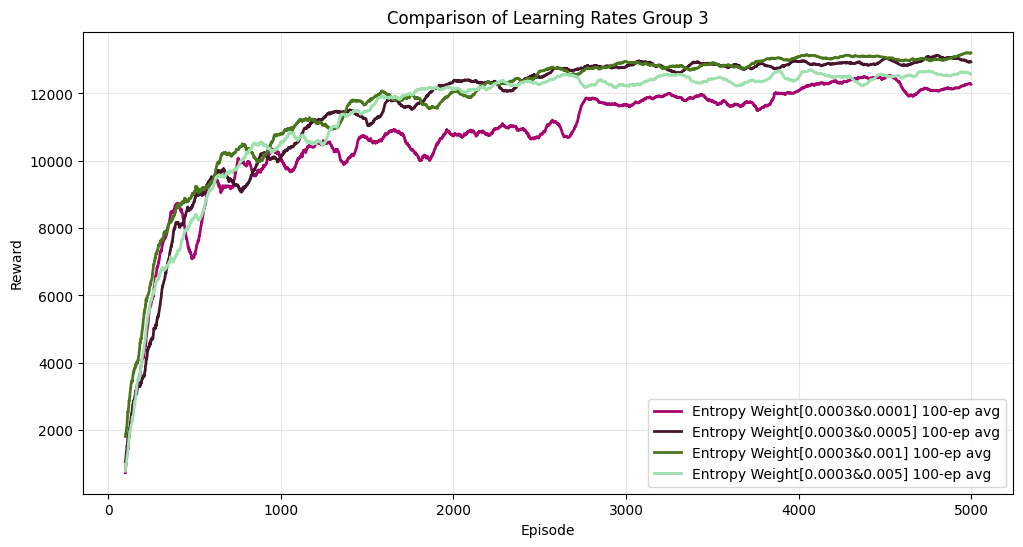

Plot saved


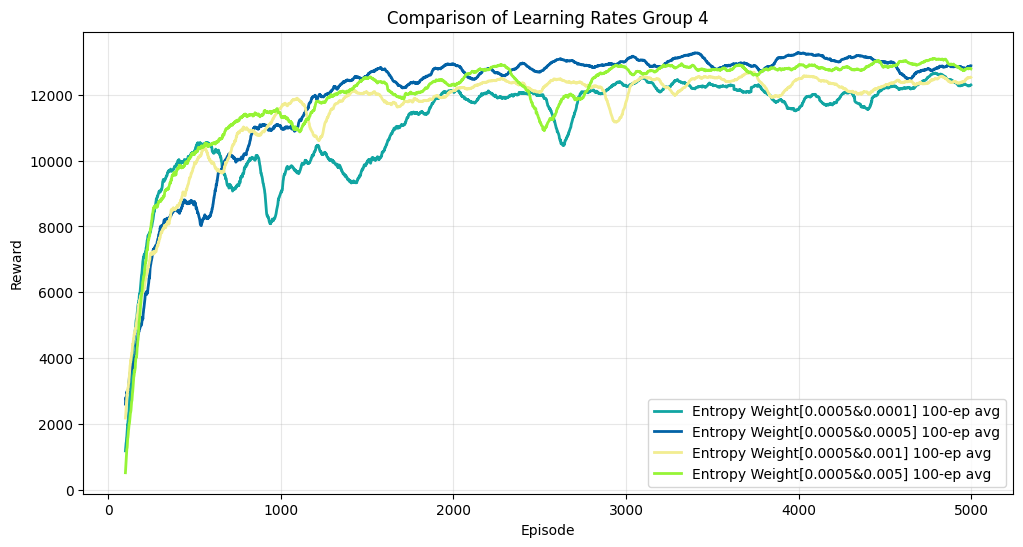

In [12]:
for i in range(0, 16, 4):
    display_plot(
        rewards_list=rewards_list[i:i+4],
        episodes_list=episodes_list[i:i+4],
        names=names[i:i+4],
        plot_title=f'Learning Rates Group {i//4 + 1}',
        save=True
    )

Plot saved


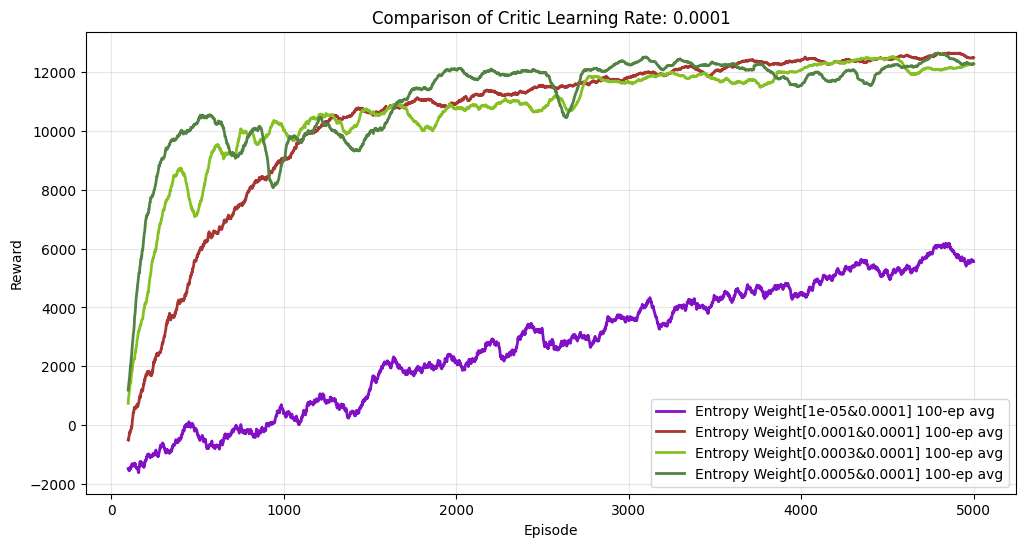

Plot saved


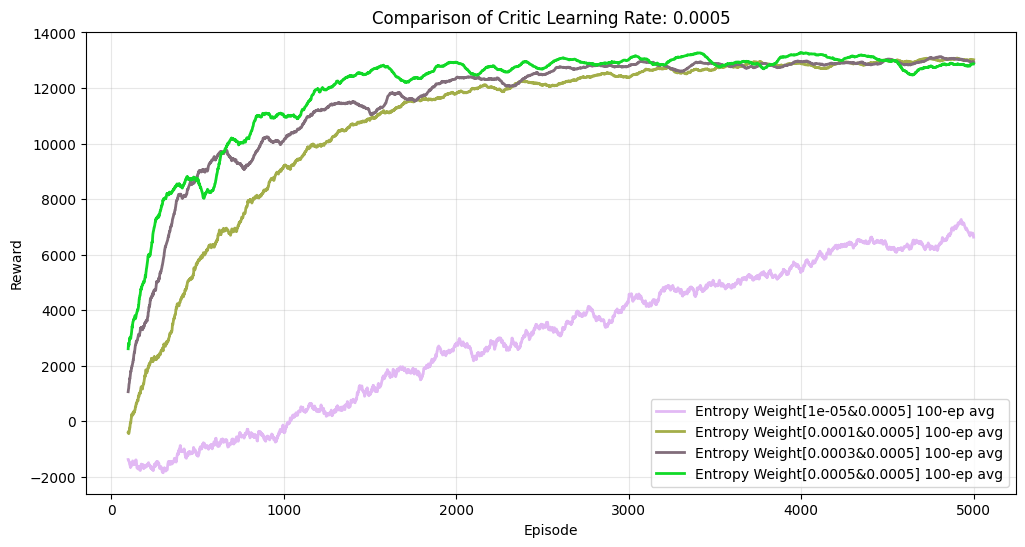

Plot saved


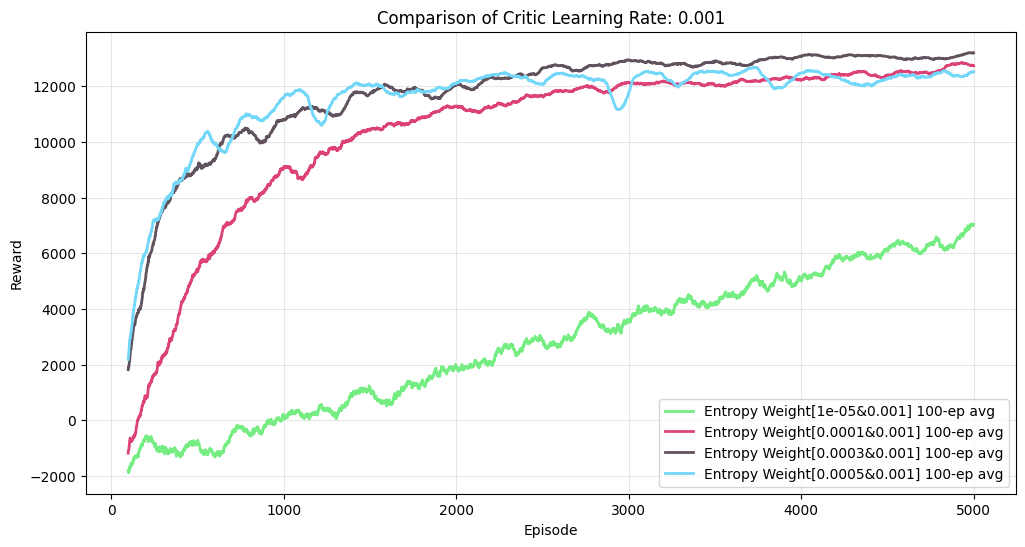

Plot saved


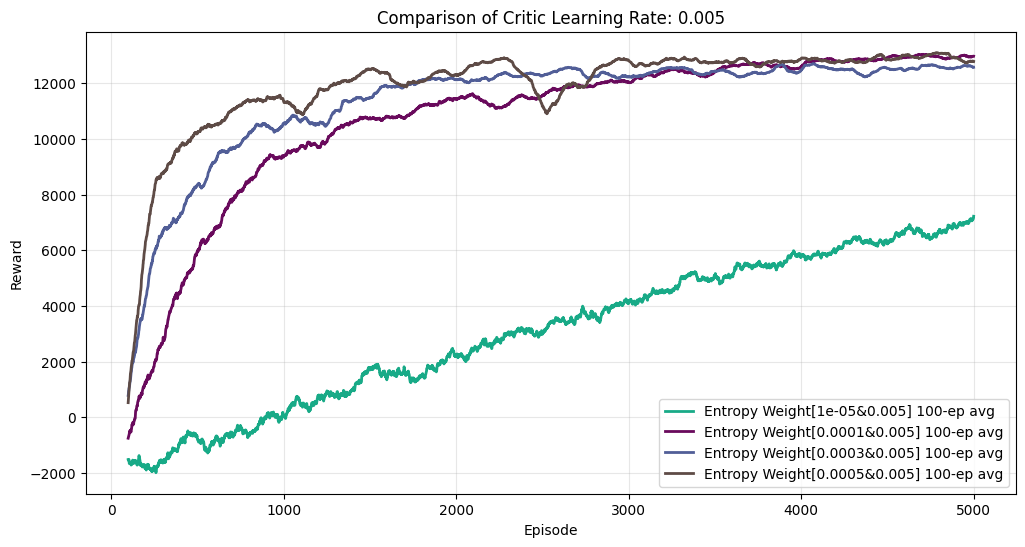

In [13]:
from collections import defaultdict

# Step 1: Create grouped dicts
grouped_rewards = defaultdict(list)
grouped_episodes = defaultdict(list)
grouped_names = defaultdict(list)

for r, e, n in zip(rewards_list, episodes_list, names):
    # Extract critic learning rate from name
    critic_lr = n.split('&')[1].split(']')[0]

    grouped_rewards[critic_lr].append(r)
    grouped_episodes[critic_lr].append(e)
    grouped_names[critic_lr].append(n)

# Step 2: Plot by group
for idx, critic_lr in enumerate(sorted(grouped_rewards.keys(), key=float)):
    display_plot(
        rewards_list=grouped_rewards[critic_lr],
        episodes_list=grouped_episodes[critic_lr],
        names=grouped_names[critic_lr],
        plot_title=f'Critic Learning Rate: {critic_lr}',
        save=True
    )